In [10]:
import os,sys
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns

FUNCTION_PATH = os.path.abspath(os.path.join('./functions/'))
sys.path.insert(0, FUNCTION_PATH)

from sampling import create_sample, load_mean_and_cov, unconditional_samples, subset_params, fix_true_params, params_to_respy
from qoi import unconditional_quantile_y, conditional_quantile_y, quantitiy_of_interest
from QBSM import quantile_measures, normalized_quantile_measures
from sobol_indices import sobol_indices
from plots.choice import choiceovertime
from plots.heatmap import heatmeap_corr
from plots.qoi_plot import qoi_kde
from plots.QBSM_plot import QBSM_plot, compute_QBSM

### Figure 2. Heat map of selective parameters

(<Figure size 1080x720 with 2 Axes>,
 <AxesSubplot:xlabel='$\\hat{\\theta}$', ylabel='$\\hat{\\theta}$'>)

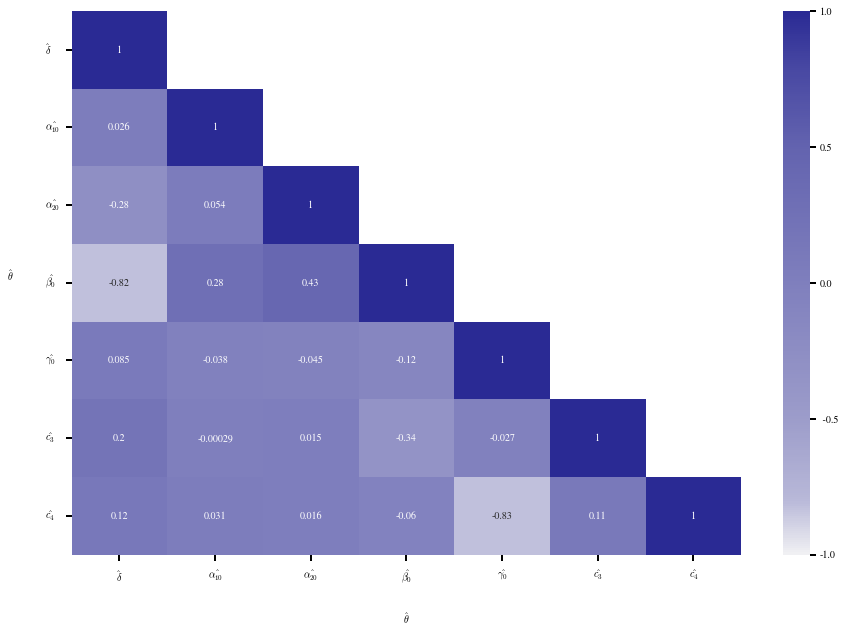

In [70]:
heatmeap_corr()

### Figure 3. Comparison of shares of occupation decisions over time between scenarios

(<Figure size 1008x432 with 2 Axes>,
 <AxesSubplot:title={'center':'Parameterization One \n with a tuition subsidy of 500 USD'}, xlabel='Period', ylabel='Share of population'>)

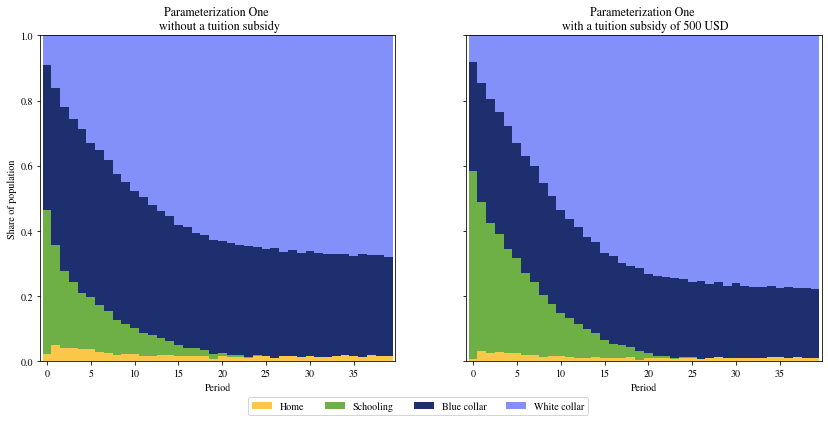

In [98]:
choiceovertime()

### Figure 4. Probability distribution of QoI

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Change in mean years of schooling', ylabel='Density'>)

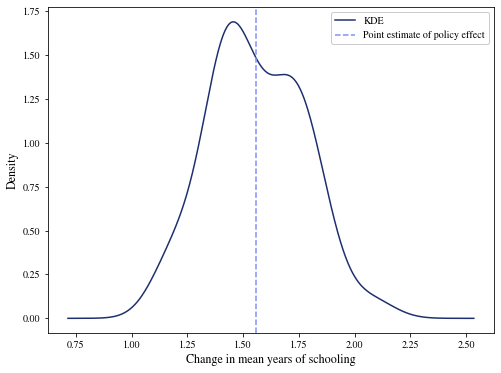

In [84]:
qoi_kde(n_bs_samples=40, bs_sample_size=100, subsidy=500)

### Figure 5. PDF of output for SA

In [4]:
input_x_respy, input_x_mix_respy = create_sample(
    n_samples=30,
    seed=123,
    M =30,
    sampling_method="random",
    MC_method="Brute force",
)

quantile_y_x = unconditional_quantile_y(input_x_respy, alpha_grid, quantitiy_of_interest)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
def y_kde_plot(y):
    fig = plt.figure(figsize=(10, 8))
    ax = sns.kdeplot(y, shade=False, color='crimson')
    kdeline = ax.lines[0]
    mean = y.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='crimson', ls=':')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    return fig, ax

(<Figure size 720x576 with 1 Axes>, <AxesSubplot:ylabel='Density'>)

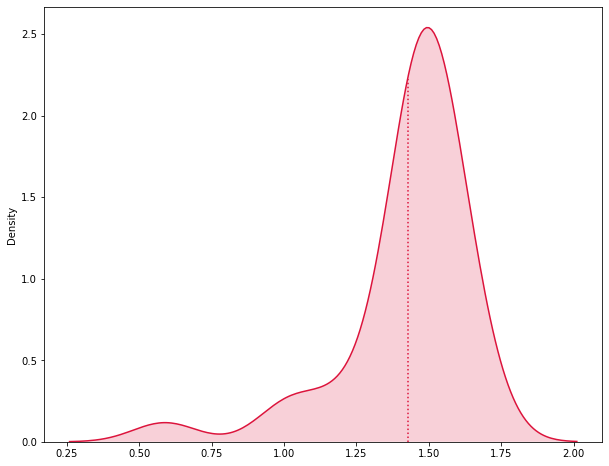

In [8]:
y_kde_plot(quantile_y_x)

### Figure 6. Quantile-base sensitivity measures on Keane and Wolpin (1994) model

In [2]:
norm_q_1, norm_q_2 = compute_QBSM(
    func=quantitiy_of_interest,
    n_samples=30,
    seed=123,
    M=30,
    sampling_method="random",
    MC_method="Brute force",
)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'$Q_i^{(1)}$ and $Q_i^{(2)}$ versus α.'}, xlabel='$\\alpha$', ylabel='Measures'>)

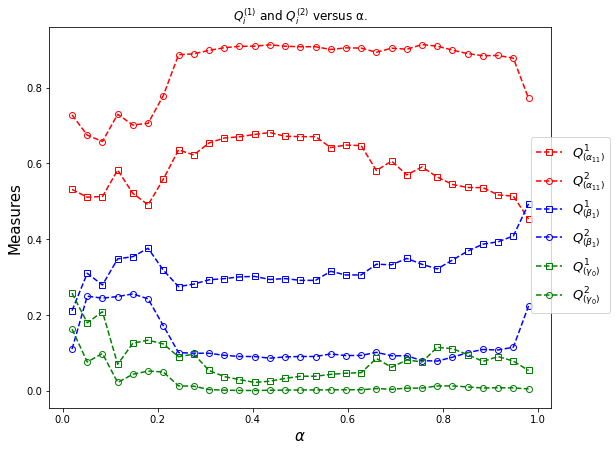

In [17]:
create_QBSM_plot(norm_q_1, norm_q_2)

### Extenstion: Quantile-base sensitivity measures versus  sobol indices

In [19]:
S_total_array = sobol_indices(
    n_samples=300,
    seed=123,
    func=quantitiy_of_interest,
    len_alp=31,
    sampling_method="random",
)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.




Term    	      Sa            Sb             S             ST         #select 
------------------------------------------------------------------------------------
alpha_{11}    	  1.03 (±0.08) -0.13 (±0.06)  0.91 (±0.05)  0.96 (±0.04)    1  
beta_{1}      	  0.14 (±0.05) -0.13 (±0.05)  0.01 (±0.04)  0.06 (±0.05)    1  
gamma_{0}     	  0.01 (±0.01) -0.01 (±0.01) -0.00 (±0.01)  0.03 (±0.02)    1  
alpha_{11}/beta_{1}   	  0.03 (±0.01)  0.01 (±0.01)  0.04 (±0.01)                  1  
alpha_{11}/gamma_{0}   	  0.02 (±0.01)  0.01 (±0.01)  0.02 (±0.01)                  1  
beta_{1}/gamma_{0}   	  0.01 (±0.01)  0.01 (±0.01)  0.01 (±0.01)                  1  
------------------------------------------------------------------------------------
Sum           	  1.25 (±0.00) -0.23 (±0.00)  0.99 (±0.00)


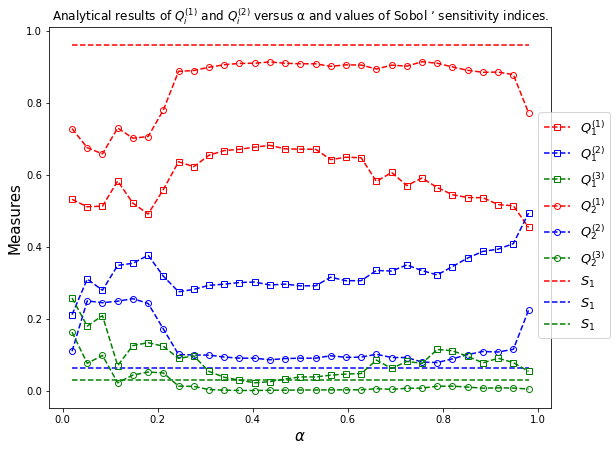

In [22]:
# # range of alpha
dalp = (0.98 - 0.02) / 30
alpha_grid = np.arange(0.02, 0.98 + dalp, dalp)  # len(alpha_grid) = 31

fig, ax = plt.subplots(figsize=(9,7))
            
ax.set_title(r'Analytical results of $Q_i^{(1)}$ and $Q_i^{(2)}$ versus α and values of Sobol ’ sensitivity indices.')
ax.set_xlabel(r"$\alpha$", fontsize=15)
ax.set_ylabel("Measures", fontsize=15)

colors = ['r','b','g']   

for i in range(3):
    ax.plot(alpha_grid, S_total_array[:, i], colors[i]+'--', label=r'$S_1$')
    ax.plot(alpha_grid, norm_q_1[:,i], colors[i]+'s--', label=r'$Q_1^{(%s)}$'%(i+1), markerfacecolor='none')
    ax.plot(alpha_grid, norm_q_2[:,i], colors[i]+'o--', label=r'$Q_2^{(%s)}$'%(i+1), markerfacecolor='none')
    
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
fig.legend(handles, labels, fontsize=13, loc="center right")

plt.show()

Accroding to thie figure. the ranking of variables determined by sobol total indices and QBSM are the same:$\alpha_{11}, \beta_{1}, \gamma_{0}$ (in descending order) for $\alpha \in [0.3, 0.7]$